# Visualización datos categóricos

In [77]:
import pandas as pd
import os

In [5]:
os.getcwd()

'/home/aramos-m/Documentos/notebooks/IBM_AI'

In [13]:
peliculas = pd.read_csv("RatingsPeliculas.csv")

In [35]:
len(peliculas)

559

In [37]:
peliculas.head()

,Pelicula,Genero,Ratings de Rotten Tomatoes %,Ratings de la Audience %,Presupuesto (millones USD),Lanzamiento
0,(500) Days of Summer,Comedia,87,81,8,2009
1,"10,000 B.C.",Aventura,9,44,105,2008
2,12 Rounds,Accion,30,52,20,2009
3,127 Hours,Aventura,93,84,18,2010
4,17 Again,Comedia,55,70,20,2009


In [39]:
peliculas.columns

Index(['Pelicula', 'Genero', 'Ratings de Rotten Tomatoes %',
       'Ratings de la Audience %', 'Presupuesto (millones USD)',
       'Lanzamiento'],
      dtype='object')

In [47]:
# Normalizamos el nombre de las columnas
peliculas.columns = ["Pelicula", "Genero", "RatingsCriticos", "RatingsAudiencia", "PresupuestoMillones", "Año"]
peliculas.head()

,Pelicula,Genero,RatingsCriticos,RatingsAudiencia,PresupuestoMillones,Año
0,(500) Days of Summer,Comedia,87,81,8,2009
1,"10,000 B.C.",Aventura,9,44,105,2008
2,12 Rounds,Accion,30,52,20,2009
3,127 Hours,Aventura,93,84,18,2010
4,17 Again,Comedia,55,70,20,2009


In [114]:
peliculas.info()
# Nota: "Año" es de tipo entero (int), pero conceptualmente representa una categoría (años discretos).
# Por lo tanto, sería más apropiado convertirla a un tipo categórico (categorical) o string.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pelicula             559 non-null    category
 1   Genero               559 non-null    category
 2   RatingsCriticos      559 non-null    int64   
 3   RatingsAudiencia     559 non-null    int64   
 4   PresupuestoMillones  559 non-null    int64   
 5   Año                  559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [53]:
peliculas.describe()

,RatingsCriticos,RatingsAudiencia,PresupuestoMillones,Año
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [67]:
# Cambiamos el tipo de datos.
peliculas.Pelicula = peliculas.Pelicula.astype("category")
peliculas.Genero = peliculas.Genero.astype('category')
peliculas.Año = peliculas.Año.astype('category')

In [69]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pelicula             559 non-null    category
 1   Genero               559 non-null    category
 2   RatingsCriticos      559 non-null    int64   
 3   RatingsAudiencia     559 non-null    int64   
 4   PresupuestoMillones  559 non-null    int64   
 5   Año                  559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [75]:
# Valores únicos de las columnas.
peliculas.Genero.cat.categories

Index(['Accion', 'Aventura', 'Comedia', 'Drama', 'Romance', 'Suspenso',
       'Terror'],
      dtype='object')

In [73]:
peliculas.describe()

,RatingsCriticos,RatingsAudiencia,PresupuestoMillones
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

# Jointplots

In [95]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

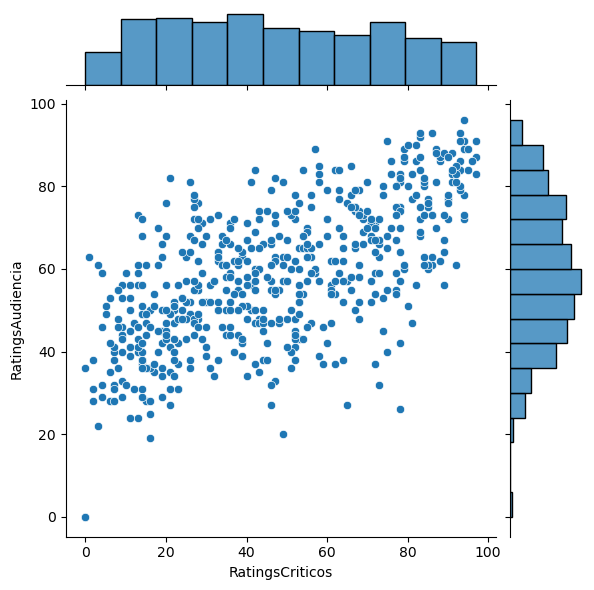

In [110]:
# Crear un jointplot para analizar la relación entre dos variables.
# - Por defecto, el tipo de gráfico (kind) es un scatterplot (gráfico de dispersión).
# - Muestra también las distribuciones marginales (histogramas) en los ejes x e y.

j = sns.jointplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia")
plt.show()

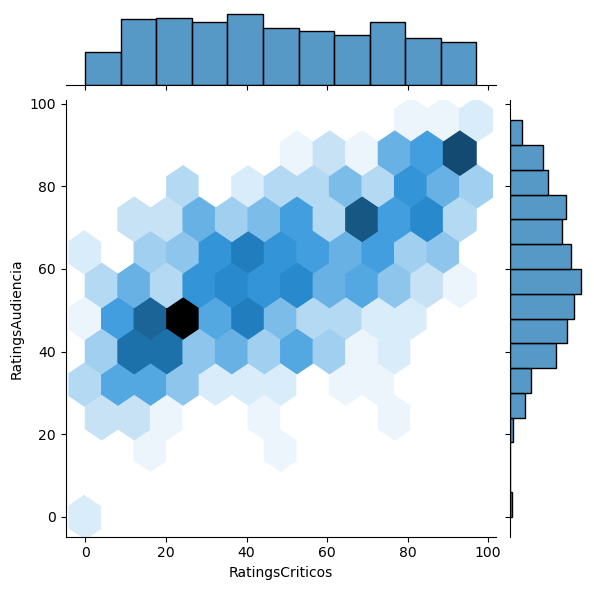

In [112]:
# Jointplots con estilos personalizados
# Gráfico 1

# Notas adicionales sobre el argumento "kind":
# - kind="scatter": Gráfico de dispersión (predeterminado).
# - kind="kde": Estimación de densidad kernel (mapa de calor o contornos).
# - kind="hist": Histograma bidimensional.
# - kind="hex": Gráfico hexbin (densidad en celdas hexagonales).
# - kind="reg": Gráfico de dispersión con línea de regresión.
# - kind="resid": Muestra los residuos de una regresión lineal.

j = sns.jointplot(data=peliculas, x="RatingsCriticos", y="RatingsAudiencia", kind="hex")
plt.show()